# Notebook TP3 Optimisation  
# DAI Yucheng - ADJAL Massyl

## Import des librairies :

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import TP3_main as main
from TP3_main import J, ImprimeIsovaleur, GradJ, d2J, PrintSolutions, NewSelution, CalMatrix_DeterNature, FindMinima, VerifyPtMin, Gradient_PasFixe

## Première partie :
### 1.1 : Tracer les isovaleurs de la fonction J

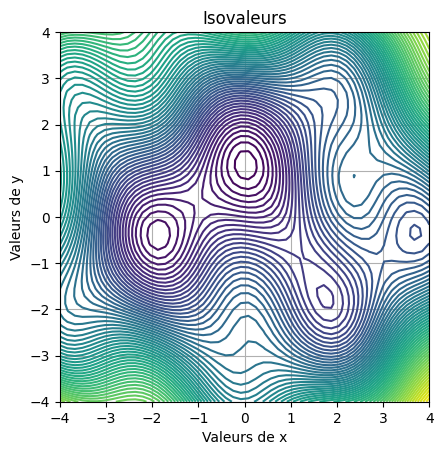

In [25]:
# Définition du domaine de tracé
xmin, xmax, nx = -4, 4, 50 # max value, min value, sample size of X
ymin, ymax, ny = -4, 4, 50 # max value, min value, sample size of Y

x1d = np.linspace(xmin,xmax,nx) # Generate nx equally spaced x-values in the range [xmin, xmax].
y1d = np.linspace(ymin,ymax,ny) # Generate ny equally spaced y-values in the range [ymin, ymax].
x2d, y2d = np.meshgrid(x1d, y1d) ## Generate a 2D grid by meshing网格化 x and y values so that the function value can be calculated at each grid point

# Tracé des isovaleurs de f1
main.ImprimeIsovaleur(main.J,x2d,y2d)



### 1.2 :

In [26]:
# Q1.2 déterminer les points critiques de 𝐽, déterminer leur nature

solutions = []                                             # afin de sauvgarder les racine de grad = 0
for x1 in x1d:
    for x2 in y1d:
        sol = main.root(main.GradJ, [x1, x2])
        if sol.success and main.NewSelution(sol.x, solutions): # si root a bien trouvé la racine et c'est pas une raciné existé
            solutions.append(sol.x.tolist()) # alors on le sauvgarde

main.PrintSolutions(solutions)
main.CalMatrix_DeterNature(solutions)
minima = main.FindMinima(main.J,x1d,y1d)
print("Les points minimals par rapport au fct scipy.optimize.minimize:\n",minima,'\n')

solutions = np.array(solutions)
print( "Toutes les solutions:\n",solutions)

main.VerifyPtMin(solutions,minima)


racines trouvées：
[-1.8707866131429896, -0.39254327179565207]
[-1.000094474670791, 0.3103021569655692]
[0.024429140235495236, 1.129908430106512]
[3.6994150600381177, -0.3349668900857044]
[1.7571265369501623, -1.749537156922367]
[1.2342058013892714, -0.8789116060185264]
[2.637174736478029, 1.1918062123063133]
[2.408369785012011, 0.8607659433320444]
[2.98550383554998, -0.8792032495782736]

Valeurs propres de la matrice : 
 [17.02749761  0.04584859] 
 [ 0.04584859 10.49082451]
  vp1 = 17.02781918183127
  vp2 = 10.490502943120207
Val min

Valeurs propres de la matrice : 
 [ -5.08356956 -10.78893838] 
 [-10.78893838   4.85268441]
  vp1 = -11.99329915879138
  vp2 = 11.762414016312164
point selle

Valeurs propres de la matrice : 
 [17.558023    1.07641634] 
 [ 1.07641634 10.24080333]
  vp1 = 17.713085678189657
  vp2 = 10.085740644940536
Val min

Valeurs propres de la matrice : 
 [14.33925612  0.32844552] 
 [0.32844552 9.0054053 ]
  vp1 = 14.359404881425311
  vp2 = 8.98525654108575
Val min

Va

## Deuxième partie :
### 2.1 :  Gradient à pas fixe

La recherche du minimum à convergé :  True
Le nombre d'itérations :  12
Le dernier point obtenu :  [-1.87058494 -0.40227924]


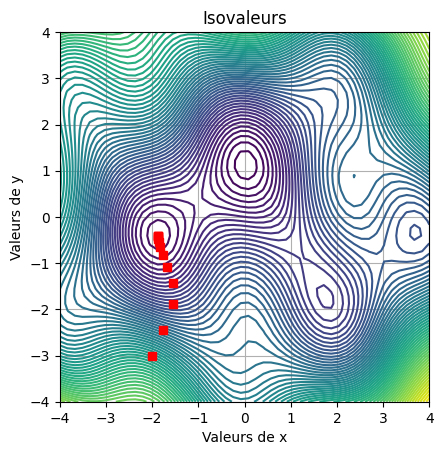

In [30]:
X0 = [-2,-3]
alpha = 0.04
epsilon = 0.01
Nmax = 1000 

Xn_vector, Converged = Gradient_PasFixe(J,GradJ,X0,alpha,epsilon,Nmax)

print("La recherche du minimum à convergé : ", Converged)
print("Le nombre d'itérations : ", len(Xn_vector)-1)
print("Le dernier point obtenu : ", Xn_vector[-1])

plt.figure()
ImprimeIsovaleur(J,x2d,y2d)
plt.plot(Xn_vector[:,0],Xn_vector[:,1],'rs', label = 'Xn')
plt.show()